# Fire Detection using EfficientDet

## Performance Comparison of Similar Models

<figure>
<img src="https://blog.roboflow.com/content/images/2020/06/yolov5-performance.png" style="width:700px">
</figure>

Check out the [EfficientDet Research Paper ](https://arxiv.org/pdf/1911.09070.pdf)  

## EfficientDet Structure
![image](https://aihub-storage.s3.ap-northeast-2.amazonaws.com/file/efficientdet.png)

### Import Libraries

In [1]:
import os
import pathlib

# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 2715, done.
remote: Counting objects: 100% (2715/2715), done.
remote: Compressing objects: 100% (2251/2251), done.
remote: Total 2715 (delta 691), reused 1241 (delta 430), pack-reused 0
Receiving objects: 100% (2715/2715), 32.69 MiB | 32.44 MiB/s, done.
Resolving deltas: 100% (691/691), done.


In [2]:
# Install the Object Detection API

#navigate to /models/research folder to compile protos
%cd /kaggle/working/models/research/

# Compile protos.
!protoc object_detection/protos/*.proto --python_out=.

# Install TensorFlow Object Detection API.
!cp object_detection/packages/tf2/setup.py .
!python -m pip -q install .

/kaggle/working/models/research
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pathos 0.2.7 requires dill>=0.3.3, but you have dill 0.3.1.1 which is incompatible.
multiprocess 0.70.11.1 requires dill>=0.3.3, but you have dill 0.3.1.1 which is incompatible.
autogluon-core 0.1.0 requires dill==0.3.3, but you have dill 0.3.1.1 which is incompatible.


In [3]:
#we will utilize the GPU in this tutorial. 
#TPU configuration is recommended for faster training on larger datsets
!pip -q install -U --pre tensorflow=="2.4"

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.5.0 requires tensorflow>=2.5.0, but you have tensorflow 2.4.0 which is incompatible.


In [4]:
#print tensorflow version
import tensorflow as tf
print("Tensorflow Version :", tf.__version__)

Tensorflow Version : 2.4.0


In [ ]:
# navigate
%cd /kaggle/working/models/research/

#run model builder test
!python object_detection/builders/model_builder_tf2_test.py

In [5]:
!pip -q install google-colab

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.17.0 requires pandas>=0.25, but you have pandas 0.24.2 which is incompatible.
wandb 0.10.26 requires six>=1.13.0, but you have six 1.12.0 which is incompatible.
visions 0.6.0 requires pandas>=0.25.3, but you have pandas 0.24.2 which is incompatible.
tsfresh 0.18.0 requires pandas>=0.25.0, but you have pandas 0.24.2 which is incompatible.
tf-models-official 2.5.0 requires tensorflow>=2.5.0, but you have tensorflow 2.4.0 which is incompatible.
tensorflow 2.4.0 requires six~=1.15.0, but you have six 1.12.0 which is incompatible.
tensorboard 2.5.0 requires google-auth<2,>=1.6.3, but you have google-auth 1.4.2 which is incompatible.
sklearn-pandas 2.1.0 requires pandas>=1.1.4, but you have pandas 0.24.2 which is incompatible.
pyldavis 3.3.1 requires numpy>=1.20.0, but you have numpy 1.19.5 which is incompatibl

In [6]:
import matplotlib
import matplotlib.pyplot as plt

import os
import random
import io
import imageio
import glob
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, Javascript
from IPython.display import Image as IPyImage

import tensorflow as tf

from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import colab_utils
from object_detection.builders import model_builder

%matplotlib inline

/opt/conda/lib/python3.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [7]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path.

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

def plot_detections(image_np,
                    boxes,
                    classes,
                    scores,
                    category_index,
                    figsize=(12, 16),
                    image_name=None):
  """Wrapper function to visualize detections.

  Args:
    image_np: uint8 numpy array with shape (img_height, img_width, 3)
    boxes: a numpy array of shape [N, 4]
    classes: a numpy array of shape [N]. Note that class indices are 1-based,
      and match the keys in the label map.
    scores: a numpy array of shape [N] or None.  If scores=None, then
      this function assumes that the boxes to be plotted are groundtruth
      boxes and plot all boxes as black with no classes or scores.
    category_index: a dict containing category dictionaries (each holding
      category index `id` and category name `name`) keyed by category indices.
    figsize: size for the figure.
    image_name: a name for the image file.
  """
  image_np_with_annotations = image_np.copy()
  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_annotations,
      boxes,
      classes,
      scores,
      category_index,
      use_normalized_coordinates=True,
      min_score_thresh=0.8)
  if image_name:
    plt.imsave(image_name, image_np_with_annotations)
  else:
    plt.imshow(image_np_with_annotations)

In [ ]:
# #Downloading data from Roboflow
# #UPDATE THIS LINK - get our data from Roboflow
# %cd /kaggle/working
# !curl -L "https://app.roboflow.ai/ds/EVwoZwzA30?key=6OawcH9tOw" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [8]:
# clone github repo
%cd /kaggle/working/
!git clone https://github.com/ruhyadi/Fire-Detection

/kaggle/working
Cloning into 'Fire-Detection'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 71 (delta 32), reused 53 (delta 17), pack-reused 0
Unpacking objects: 100% (71/71), done.


In [9]:
# NOTE: Update these TFRecord names from "cells" and "cells_label_map" to your files!
test_record_fname = '/kaggle/working/Fire-Detection/tfrecord/test/test.tfrecord'
train_record_fname = '/kaggle/working/Fire-Detection/tfrecord/train/train.tfrecord'
label_map_pbtxt_fname = '/kaggle/working/Fire-Detection/tfrecord/train/Fire_label_map.pbtxt'

### Download Model

In [11]:
##Change chosen model to deploy different models available in the TF2 object detection zoo
MODELS_CONFIG = {
    'efficientdet-d0': {
        'model_name': 'efficientdet_d0_coco17_tpu-32',
        'base_pipeline_file': 'ssd_efficientdet_d0_512x512_coco17_tpu-8.config',
        'pretrained_checkpoint': 'efficientdet_d0_coco17_tpu-32.tar.gz',
        'batch_size': 8
    },
    'efficientdet-d1': {
        'model_name': 'efficientdet_d1_coco17_tpu-32',
        'base_pipeline_file': 'ssd_efficientdet_d1_640x640_coco17_tpu-8.config',
        'pretrained_checkpoint': 'efficientdet_d1_coco17_tpu-32.tar.gz',
        'batch_size': 16
    },
    'efficientdet-d2': {
        'model_name': 'efficientdet_d2_coco17_tpu-32',
        'base_pipeline_file': 'ssd_efficientdet_d2_768x768_coco17_tpu-8.config',
        'pretrained_checkpoint': 'efficientdet_d2_coco17_tpu-32.tar.gz',
        'batch_size': 16
    },
        'efficientdet-d3': {
        'model_name': 'efficientdet_d3_coco17_tpu-32',
        'base_pipeline_file': 'ssd_efficientdet_d3_896x896_coco17_tpu-32.config',
        'pretrained_checkpoint': 'efficientdet_d3_coco17_tpu-32.tar.gz',
        'batch_size': 16
    }
}

#in this tutorial we implement the lightweight, smallest state of the art efficientdet model
#if you want to scale up tot larger efficientdet models you will likely need more compute!
chosen_model = 'efficientdet-d0'

num_steps = 5000 #The more steps, the longer the training. Increase if your loss function is still decreasing and validation metrics are increasing. 
num_eval_steps = 500 #Perform evaluation after so many steps

model_name = MODELS_CONFIG[chosen_model]['model_name']
pretrained_checkpoint = MODELS_CONFIG[chosen_model]['pretrained_checkpoint']
base_pipeline_file = MODELS_CONFIG[chosen_model]['base_pipeline_file']
batch_size = MODELS_CONFIG[chosen_model]['batch_size'] #if you can fit a large batch in memory, it may speed up your training

In [12]:
#download pretrained weights
%mkdir /kaggle/working/models/research/deploy/
%cd /kaggle/working/models/research/deploy/
import tarfile
download_tar = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/' + pretrained_checkpoint

!wget {download_tar}
tar = tarfile.open(pretrained_checkpoint)
tar.extractall()
tar.close()

/kaggle/working/models/research/deploy
--2021-06-21 15:35:37--  http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.26.128, 2607:f8b0:400c:c04::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.26.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30736482 (29M) [application/x-tar]
Saving to: ‘efficientdet_d0_coco17_tpu-32.tar.gz’

efficientdet_d0_coc 100%[===================>]  29.31M  68.4MB/s    in 0.4s    

2021-06-21 15:35:38 (68.4 MB/s) - ‘efficientdet_d0_coco17_tpu-32.tar.gz’ saved [30736482/30736482]



In [13]:
#download base training configuration file
%cd /kaggle/working/models/research/deploy
download_config = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/' + base_pipeline_file
!wget {download_config}

/kaggle/working/models/research/deploy
--2021-06-21 15:35:39--  https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_efficientdet_d0_512x512_coco17_tpu-8.config
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4630 (4.5K) [text/plain]
Saving to: ‘ssd_efficientdet_d0_512x512_coco17_tpu-8.config’

ssd_efficientdet_d0 100%[===================>]   4.52K  --.-KB/s    in 0s      

2021-06-21 15:35:40 (36.8 MB/s) - ‘ssd_efficientdet_d0_512x512_coco17_tpu-8.config’ saved [4630/4630]



In [14]:
%cd /kaggle/working/models/research/deploy
%ls

/kaggle/working/models/research/deploy
efficientdet_d0_coco17_tpu-32/
efficientdet_d0_coco17_tpu-32.tar.gz
ssd_efficientdet_d0_512x512_coco17_tpu-8.config


In [15]:
#prepare
pipeline_fname = '/kaggle/working/models/research/deploy/' + base_pipeline_file
fine_tune_checkpoint = '/kaggle/working/models/research/deploy/' + model_name + '/checkpoint/ckpt-0'

def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())
num_classes = get_num_classes(label_map_pbtxt_fname)

In [16]:
#write custom configuration file by slotting our dataset, model checkpoint, and training parameters into the base pipeline file

import re

%cd /kaggle/working/models/research/deploy
print('writing custom configuration file')

with open(pipeline_fname) as f:
    s = f.read()
with open('pipeline_file.config', 'w') as f:
    
    # fine_tune_checkpoint
    s = re.sub('fine_tune_checkpoint: ".*?"',
               'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)
    
    # tfrecord files train and test.
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/train)(.*?")', 'input_path: "{}"'.format(train_record_fname), s)
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/val)(.*?")', 'input_path: "{}"'.format(test_record_fname), s)

    # label_map_path
    s = re.sub(
        'label_map_path: ".*?"', 'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)

    # Set training batch_size.
    s = re.sub('batch_size: [0-9]+',
               'batch_size: {}'.format(batch_size), s)

    # Set training steps, num_steps
    s = re.sub('num_steps: [0-9]+',
               'num_steps: {}'.format(num_steps), s)
    
    # Set number of classes num_classes.
    s = re.sub('num_classes: [0-9]+',
               'num_classes: {}'.format(num_classes), s)
    
    #fine-tune checkpoint type
    s = re.sub(
        'fine_tune_checkpoint_type: "classification"', 'fine_tune_checkpoint_type: "{}"'.format('detection'), s)
        
    f.write(s)

/kaggle/working/models/research/deploy
writing custom configuration file


In [17]:
%cat /kaggle/working/models/research/deploy/pipeline_file.config

 # SSD with EfficientNet-b0 + BiFPN feature extractor,
# shared box predictor and focal loss (a.k.a EfficientDet-d0).
# See EfficientDet, Tan et al, https://arxiv.org/abs/1911.09070
# See Lin et al, https://arxiv.org/abs/1708.02002
# Trained on COCO, initialized from an EfficientNet-b0 checkpoint.
#
# Train on TPU-8

model {
  ssd {
    inplace_batchnorm_update: true
    freeze_batchnorm: false
    num_classes: 1
    add_background_class: false
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
        use_matmul_gather: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    encode_background_as_zeros: true
    anchor_generator {
      m

In [18]:
pipeline_file = '/kaggle/working/models/research/deploy/pipeline_file.config'
model_dir = '/kaggle/working/training/'

In [19]:
!python /kaggle/working/models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={pipeline_file} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --sample_1_of_n_eval_examples=1 \
    --num_eval_steps={num_eval_steps}

2021-06-21 15:37:03.147517: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-06-21 15:37:06.302731: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-06-21 15:37:06.304077: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-06-21 15:37:06.342918: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-21 15:37:06.343643: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-06-21 15:37:06.343695: I tensorflow/stream_executor/platform/def

In [20]:
#see where our model saved weights
%ls '/kaggle/working/training/'

checkpoint                  ckpt-2.data-00000-of-00001  ckpt-3.index
ckpt-1.data-00000-of-00001  ckpt-2.index                train/
ckpt-1.index                ckpt-3.data-00000-of-00001


In [21]:
#run conversion script
import re
import numpy as np

output_directory = '/kaggle/working/fine_tuned_model'

#place the model weights you would like to export here
last_model_path = '/kaggle/working/training/'
print(last_model_path)
!python /kaggle/working/models/research/object_detection/exporter_main_v2.py \
    --trained_checkpoint_dir {last_model_path} \
    --output_directory {output_directory} \
    --pipeline_config_path {pipeline_file}

/kaggle/working/training/
2021-06-21 16:00:18.327787: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-06-21 16:00:21.386083: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-06-21 16:00:21.388918: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-06-21 16:00:21.410273: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-21 16:00:21.410996: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-06-21 16:00:21.411051: I tensorflow/st

In [22]:
%ls '/kaggle/working/fine_tuned_model/saved_model/'

assets/  saved_model.pb  variables/


In [ ]:
# #downloading test images from Roboflow
# #export dataset above with format COCO JSON
# #or import your test images via other means. 
# %mkdir /kaggle/working/test/
# %cd /kaggle/working/test/
# !curl -L "https://app.roboflow.ai/ds/lzluJXV2ee?key=9QBlNZuk3r" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [23]:
import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf

from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

%matplotlib inline

In [24]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: the file path to the image

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [27]:
%ls '/kaggle/working/training/'

checkpoint                  ckpt-2.data-00000-of-00001  ckpt-3.index
ckpt-1.data-00000-of-00001  ckpt-2.index                train/
ckpt-1.index                ckpt-3.data-00000-of-00001


### Inference

In [51]:
#recover our saved model
pipeline_config = pipeline_file
#generally you want to put the last ckpt from training in here
model_dir = '/kaggle/working/training/ckpt-2'
configs = config_util.get_configs_from_pipeline_file(pipeline_config)
model_config = configs['model']
detection_model = model_builder.build(
      model_config=model_config, is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(
      model=detection_model)
ckpt.restore(os.path.join('/kaggle/working/training/ckpt-2'))


def get_model_detection_function(model):
  """Get a tf.function for detection."""

  @tf.function
  def detect_fn(image):
    """Detect objects in image."""

    image, shapes = model.preprocess(image)
    prediction_dict = model.predict(image, shapes)
    detections = model.postprocess(prediction_dict, shapes)

    return detections, prediction_dict, tf.reshape(shapes, [-1])

  return detect_fn

detect_fn = get_model_detection_function(detection_model)

In [52]:
#map labels for inference decoding
label_map_path = configs['eval_input_config'].label_map_path
label_map = label_map_util.load_labelmap(label_map_path)
categories = label_map_util.convert_label_map_to_categories(
    label_map,
    max_num_classes=label_map_util.get_max_label_map_index(label_map),
    use_display_name=True)
category_index = label_map_util.create_category_index(categories)
label_map_dict = label_map_util.get_label_map_dict(label_map, use_display_name=True)

In [65]:
%ls /kaggle/working/Fire-Detection/test-image

test-1.jpg  test-2.jpg  test-3.jpg  test-4.jpg  test-5.jpg


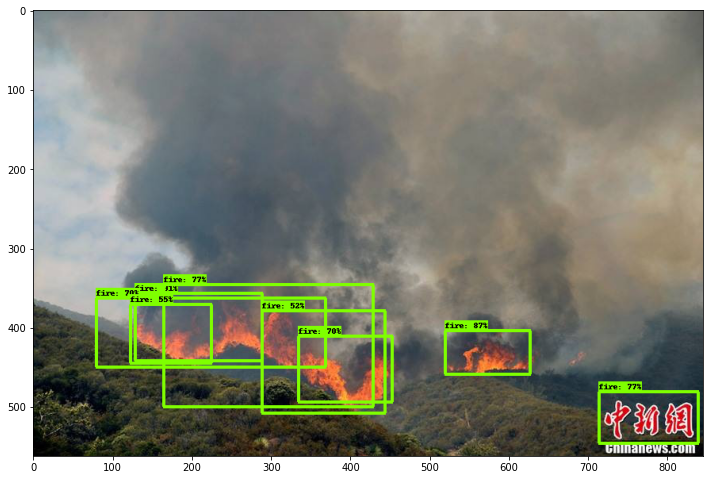

In [72]:
#run detector on test image
#it takes a little longer on the first run and then runs at normal speed. 
import random

# TEST_IMAGE_PATHS = glob.glob('/kaggle/working/Fire-Detection/test-image/*.jpg')
# image_path = random.choice(TEST_IMAGE_PATHS)
image_path = '/kaggle/working/Fire-Detection/test-image/test-4.jpg'
image_np = load_image_into_numpy_array(image_path)

# Things to try:
# Flip horizontally
# image_np = np.fliplr(image_np).copy()

# Convert image to grayscale
# image_np = np.tile(
#     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

input_tensor = tf.convert_to_tensor(
    np.expand_dims(image_np, 0), dtype=tf.float32)
detections, predictions_dict, shapes = detect_fn(input_tensor)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'][0].numpy(),
      (detections['detection_classes'][0].numpy() + label_id_offset).astype(int),
      detections['detection_scores'][0].numpy(),
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.5,
      agnostic_mode=False,
)

plt.figure(figsize=(12,16))
plt.imshow(image_np_with_detections)
plt.show()

In [73]:
!zip -r /kaggle/working/fine_tuned_model.zip /kaggle/working/fine_tuned_model
!zip -r /kaggle/working/training.zip /kaggle/working/training

  adding: kaggle/working/fine_tuned_model/ (stored 0%)
  adding: kaggle/working/fine_tuned_model/checkpoint/ (stored 0%)
  adding: kaggle/working/fine_tuned_model/checkpoint/ckpt-0.data-00000-of-00001 (deflated 36%)
  adding: kaggle/working/fine_tuned_model/checkpoint/checkpoint (deflated 41%)
  adding: kaggle/working/fine_tuned_model/checkpoint/ckpt-0.index (deflated 80%)
  adding: kaggle/working/fine_tuned_model/pipeline.config (deflated 68%)
  adding: kaggle/working/fine_tuned_model/saved_model/ (stored 0%)
  adding: kaggle/working/fine_tuned_model/saved_model/saved_model.pb (deflated 93%)
  adding: kaggle/working/fine_tuned_model/saved_model/variables/ (stored 0%)
  adding: kaggle/working/fine_tuned_model/saved_model/variables/variables.data-00000-of-00001 (deflated 36%)
  adding: kaggle/working/fine_tuned_model/saved_model/variables/variables.index (deflated 78%)
  adding: kaggle/working/fine_tuned_model/saved_model/assets/ (stored 0%)
  adding: kaggle/working/training/ (stored 0%

In [74]:
%cd /kaggle/working

!rm -rf ./training
!rm -rf ./models
!rm -rf ./fine_tuned_model
!rm -rf ./Fire-Detection

/kaggle/working


In [ ]:
#test_image_dir = '/kaggle/working/Repo/test images/smoke test/'
test_image_dir = '/kaggle/working/Repo/test images/smoke test/'
test_images_np = []
for i in range(1, 48):
  image_path = os.path.join(test_image_dir, 'frames (' + str(i) + ')' +'.jpeg')
  test_images_np.append(np.expand_dims(
      load_image_into_numpy_array(image_path), axis=0))

# Again, uncomment this decorator if you want to run inference eagerly
@tf.function
def detect(input_tensor):
  """Run detection on an input image.

  Args:
    input_tensor: A [1, height, width, 3] Tensor of type tf.float32.
      Note that height and width can be anything since the image will be
      immediately resized according to the needs of the model within this
      function.

  Returns:
    A dict containing 3 Tensors (`detection_boxes`, `detection_classes`,
      and `detection_scores`).
  """
  preprocessed_image, shapes = detection_model.preprocess(input_tensor)
  prediction_dict = detection_model.predict(preprocessed_image, shapes)
  
  return detection_model.postprocess(prediction_dict, shapes)

# Note that the first frame will trigger tracing of the tf.function, which will
# take some time, after which inference should be fast.

label_id_offset = 1
for i in range(len(test_images_np)):
  input_tensor = tf.convert_to_tensor(test_images_np[i], dtype=tf.float32)
  detections = detect(input_tensor)

  plot_detections(
      test_images_np[i][0],
      detections['detection_boxes'][0].numpy(),
      detections['detection_classes'][0].numpy().astype(np.uint32)
      + label_id_offset,
      detections['detection_scores'][0].numpy(),
      category_index, figsize=(15, 20), image_name="gif_frame_" + ('%02d' % i) + ".jpeg")

In [ ]:
imageio.plugins.freeimage.download()

anim_file = 'smoke_test.gif'

filenames = glob.glob('gif_frame_*.jpeg')
filenames = sorted(filenames)
last = -1
images = []
for filename in filenames:
  image = imageio.imread(filename)
  images.append(image)

imageio.mimsave(anim_file, images, 'GIF-FI', fps=5)

display(IPyImage(open(anim_file, 'rb').read()))